In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [54]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# MUSHROOM CHECK BALANCE


' poisonous'_to_'edible' ratio: 0.93\poisonous_cnt:3916, edible_cnt: 4208


<AxesSubplot:title={'center':'Balance checking for input class in mushroom Dataset'}, xlabel='class', ylabel='count'>

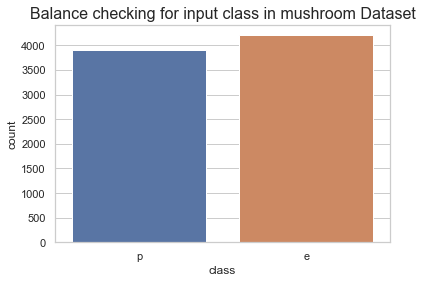

In [8]:
#check mushroom balance
#poisnous to edible ratio
edible_cnt=df[df ["class"] =="e"]["class"].count()
poisonous_cnt=df[df ["class"] =="p"]["class"].count()
p_e_ratio=poisonous_cnt/float(edible_cnt)
print("\n' poisonous'_to_'edible' ratio: {}\poisonous_cnt:{}, edible_cnt: {}"
      .format(p_e_ratio.round(2),poisonous_cnt, edible_cnt))

#Edible vs Poisonous Balance through visialization.
sns.set(style="whitegrid")
plt.title("Balance checking for input class in mushroom Dataset", fontsize=16)
sns.countplot(x = df["class"],data = df)


# Univariate analysis

In [9]:
col=df.columns
len(col)

23

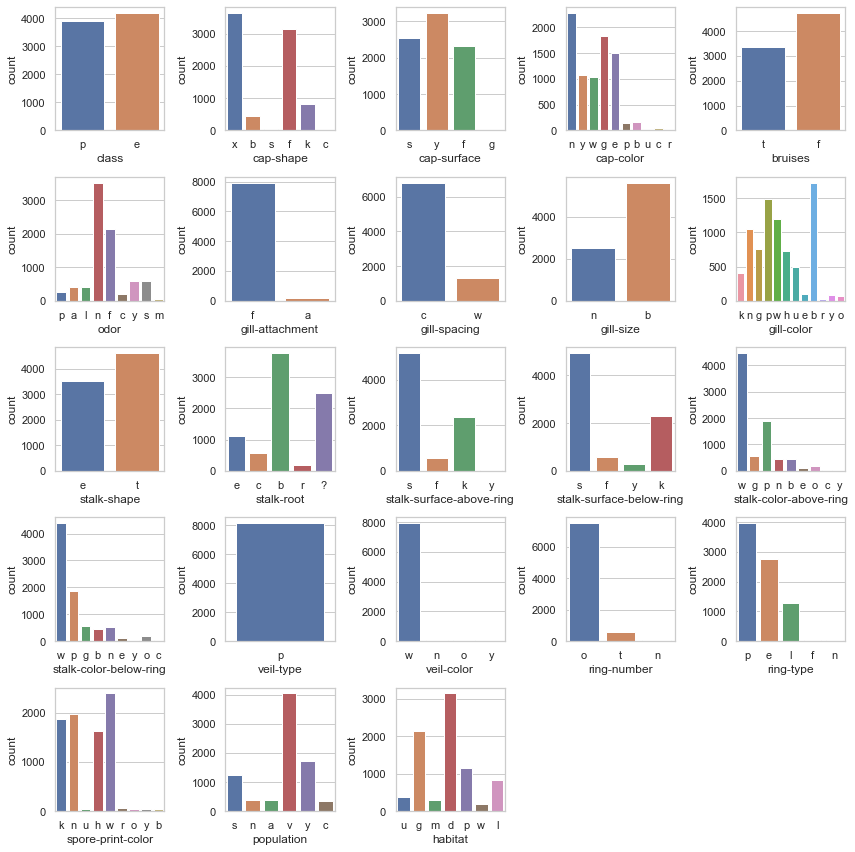

In [10]:
#plotting each feature and target
plt.figure(figsize=(12,12))

for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],data=df)
    plt.tight_layout()


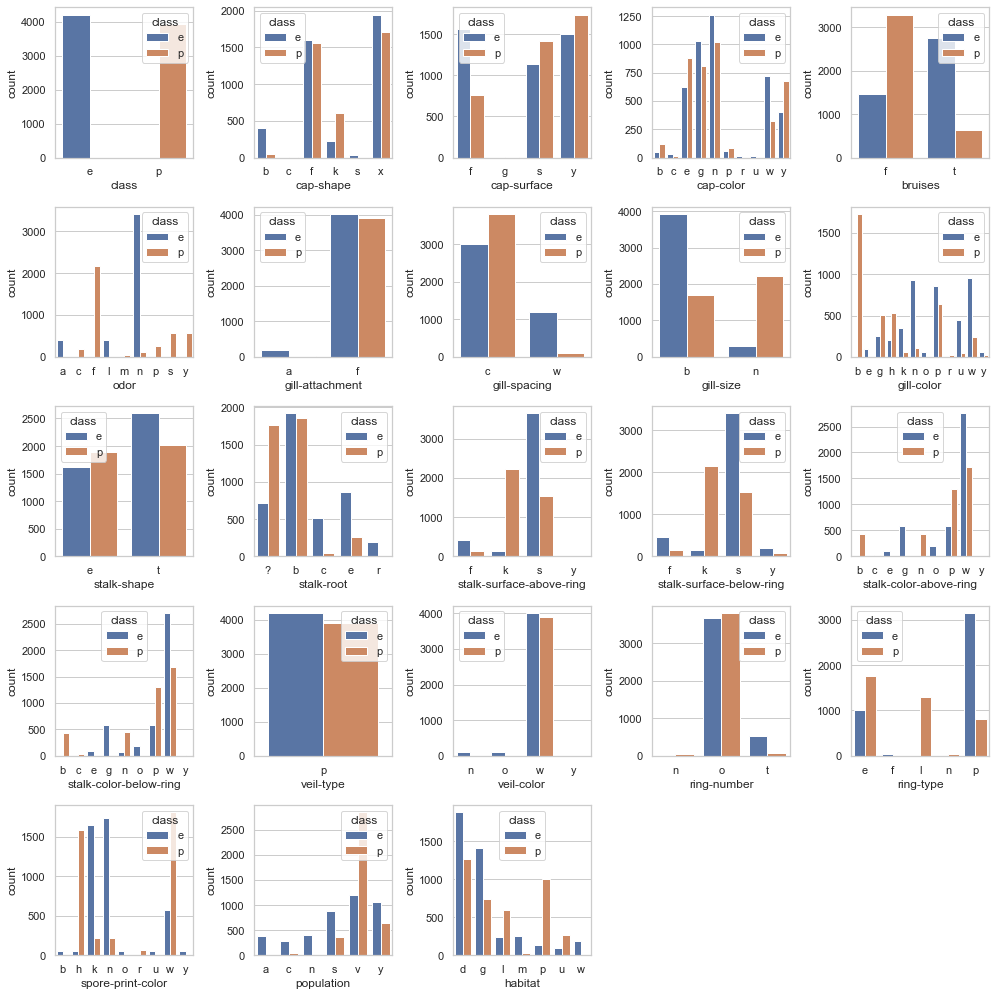

In [11]:
# checking each feature with the target variable
df=df.astype('category')
df.dtypes
plt.figure(figsize=(14,14))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],hue='class',data=df)
    plt.tight_layout()

# DATA CLEANING

In [12]:
df.drop('veil-type' ,axis=1, inplace=True)

In [13]:
le=LabelEncoder()
col=df.columns
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


for class 1- poisonous and 0- edible

# SPLIT-TRAIN-TEST DATA INTO X AND Y

In [26]:
x=df.drop('class',axis=1)
y=df['class']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  0.9499589827727646
confusion matrix 
 [[1200   57]
 [  65 1116]]
classification report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [35]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    y_pred=lr.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.6301538461538462
accuracy score  0.984
accuracy score  0.8756923076923077
accuracy score  0.9981538461538462
accuracy score  0.7136699507389163
mean accuracy score 0.8403339901477832


In [37]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  1.0
confusion matrix 
 [[1257    0]
 [   0 1181]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# CROSS VALIDATION

In [38]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dt.fit(xtrain,ytrain)
    y_pred=dt.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8818461538461538
confusion matrix
 [[841   0]
 [192 592]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.7192118226600985
confusion matrix
 [[385 456]
 [  0 783]]
mean accuracy score 0.9202115953012505


In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy score ',accuracy_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('classification report \n',classification_report(y_test,y_pred))

accuracy score  1.0
confusion matrix 
 [[1257    0]
 [   0 1181]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [43]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rf.fit(xtrain,ytrain)
    y_pred=rf.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8424615384615385
confusion matrix
 [[841   0]
 [256 528]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.625
confusion matrix
 [[232 609]
 [  0 783]]
mean accuracy score 0.8934923076923077


# APPLYING HYPERPARAMETER TUNING

# DECISION TREE TUNING

In [45]:
params={'criterion':['gini', 'entropy'],
        'max_depth':[3,4,5,6,7,8,9,10],
        'splitter':['best','random'],
        'min_samples_split':[2,4,6,10,12],
        'min_samples_leaf':[1,2,3,4],
        'max_features':['sqrt','log2',None],
        'random_state':[42,]}

dt_reg=GridSearchCV(estimator=dt,
                    param_grid=params,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

dt_reg.fit(x_train,y_train)
print('best score ',dt_reg.best_score_)
dtbest=dt_reg.best_estimator_
print(dtbest)

best score  1.0
DecisionTreeClassifier(max_depth=7, random_state=42)


In [46]:
kfold=StratifiedKFold(n_splits=5) # to get a balanced split
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    dtbest.fit(xtrain,ytrain)
    y_pred=dtbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8572307692307692
confusion matrix
 [[801  40]
 [192 592]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.6896551724137931
confusion matrix
 [[337 504]
 [  0 783]]
mean accuracy score 0.9093771883289126


Decision Tress does not improves the accuracy. So, we can check with another model i.e Random forest tuning

# RANDOM FOREST TUNING

In [47]:
para={'criterion':['gini','entropy'],
     'max_depth':[5,6,7,8],
     'min_samples_split':[2,4],
     'min_samples_leaf':[1,2],
      'random_state':[42,],
     'max_samples':[int(i) for i in np.linspace(1000,5100,5)]
     } 

rf_reg=GridSearchCV(estimator=rf,
                    param_grid=para,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1)

rf_reg.fit(x_train,y_train)
print('best score ',rf_reg.best_score_)
rfbest=rf_reg.best_estimator_
print(rfbest)

best score  1.0
RandomForestClassifier(max_depth=8, max_samples=2025, random_state=42)


In [49]:
kfold=StratifiedKFold(n_splits=5) 
accuracy=[]
for train_index,test_index in kfold.split(x,y):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    rfbest.fit(xtrain,ytrain)
    y_pred=rfbest.predict(xtest)
    print('accuracy score ',accuracy_score(ytest,y_pred))
    accuracy.append(accuracy_score(ytest,y_pred))
    print('confusion matrix\n',confusion_matrix(ytest,y_pred))
print('mean accuracy score',sum(accuracy)/len(accuracy))

accuracy score  0.8424615384615385
confusion matrix
 [[841   0]
 [256 528]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.9612307692307692
confusion matrix
 [[842   0]
 [ 63 720]]
accuracy score  1.0
confusion matrix
 [[842   0]
 [  0 783]]
accuracy score  0.5584975369458128
confusion matrix
 [[124 717]
 [  0 783]]
mean accuracy score 0.8724379689276243


So, the best model is decision tree without hyperparameter tuning because it has good accuracy score

In [50]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

saving the model

In [56]:
joblib.dump(dt,'mushroom.pkl')

['mushroom.pkl']

In [57]:
model=joblib.load('mushroom.pkl')
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

1.0